In [69]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('csv/Social ATC Export.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Social Campaign Advertiser                             183 non-null    object 
 1   Campaign Name                                          183 non-null    object 
 2   Media Buy Name                                         183 non-null    object 
 3   Social Platform                                        183 non-null    object 
 4   Display Vehicle (Mapped)                               183 non-null    object 
 5   [NEW MAPPED] Display Business Unit                     183 non-null    object 
 6   Report Site Name                                       183 non-null    object 
 7   Audience Type                                          183 non-null    object 
 8   Display Audience Funnel                           

In [72]:
filtered_df = df[(df['Filterable Spend'] > 1000)
                & (df['Audience Type'] == '3PD')
                & (df['Social Platform'] == 'Facebook/Instagram')
                ]

In [73]:
grouped_df = filtered_df.groupby(['Display Audience Funnel','Campaign Name','Media Buy Name'])[['Filterable Spend','Add To Cart']].sum().reset_index()

In [74]:
grouped_df['Cpatc'] = grouped_df['Filterable Spend'] / grouped_df['Add To Cart']

In [75]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Display Audience Funnel  42 non-null     object 
 1   Campaign Name            42 non-null     object 
 2   Media Buy Name           42 non-null     object 
 3   Filterable Spend         42 non-null     float64
 4   Add To Cart              42 non-null     int64  
 5   Cpatc                    42 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.1+ KB


In [76]:
grouped_df.sort_values(by='Cpatc', ascending=False).head()

,Display Audience Funnel,Campaign Name,Media Buy Name,Filterable Spend,Add To Cart,Cpatc
37,Demand Creation,2024_Q3_US_SBG-Programs_HP_SOCIAL_PROSPECTING_...,FACEBOOK_AFFINITY-3PD BEHAVIOR_SOCIAL AD_1x1_D...,7000.000000,0,inf
36,Demand Creation,2024_Q3_US_SBG-Programs_HP_SOCIAL_PROSPECTING_...,FACEBOOK_AFFINITY-3PD BEHAVIOR_SOCIAL AD_1x1_D...,7993.810000,0,inf
31,Demand Creation,2024_Q3_US_CSBO-AW_HP_SOCIAL_PROSPECTING_HP,FACEBOOK_AFFINITY-3PD BEHAVIOR_SOCIAL AD_1x1_D...,5915.459999,64,92.429062
22,Active Prospects,2024_Q3_US_CSBO-CSB_AP_SOCIAL_PROSPECTING_AP,FACEBOOK_AFFINITY-3PD BEHAVIOR_SOCIAL AD_1x1_D...,5332.939999,59,90.388814
33,Demand Creation,2024_Q3_US_CSBO-CON_HP_SOCIAL_PROSPECTING_HP,FACEBOOK_AFFINITY-3PD BEHAVIOR_SOCIAL AD_1x1_D...,33655.159990,571,58.940736


<Axes: xlabel='Display Audience Funnel', ylabel='Cpatc'>

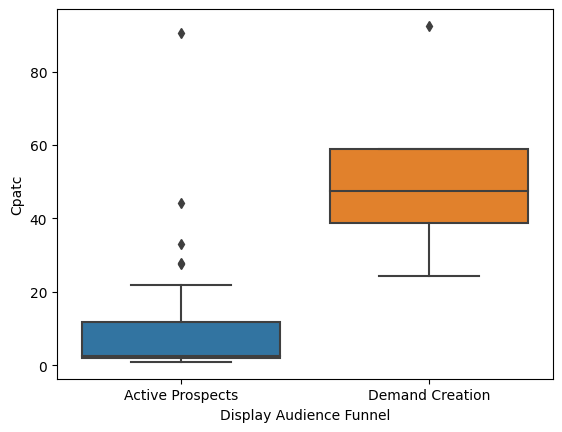

In [77]:
sns.boxplot(data=grouped_df,x='Display Audience Funnel',y='Cpatc')

<Axes: xlabel='Filterable Spend', ylabel='Cpatc'>

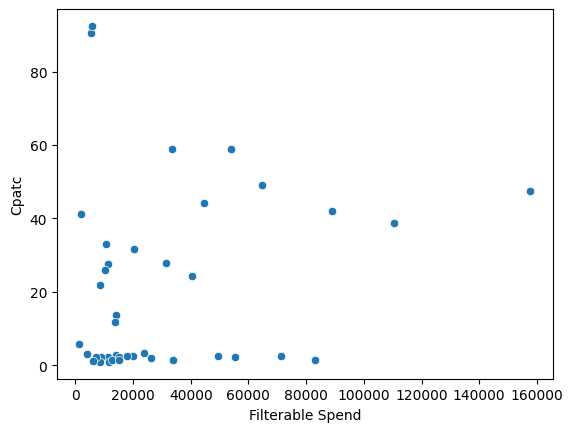

In [78]:
sns.scatterplot(data=grouped_df, x='Filterable Spend', y='Cpatc')

In [92]:
# Create scatter plot using Plotly Express with hover_name
fig = px.scatter(grouped_df, x='Filterable Spend', y='Cpatc', color='Display Audience Funnel',  title='FY24Q3 CSB SM US - 3P to 1P Opportunity - Placements<br>Filter: US, CSB, 3P, Facebook', hover_name='Media Buy Name')
fig.update_traces(marker=dict(size=12, opacity=0.7))

# Export the plot as an HTML file
fig.write_html('html/FY24Q3 CSB SM US - 3P to 1P Opportunity.html')
